<a href="https://colab.research.google.com/github/raido23/2022raido23/blob/main/6%EC%A3%BC%EC%B0%A8_%EA%B0%9C%EC%9D%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5주차 프로젝트를 조금 변경했습니다.

1. 지역별 어떤 도서관이 있는지
2. 해당 지역의 인구변화와 도서관 이용객과의 관계를 알아보고자 했습니다.
3. 지역별 도서관 총 이용자 수 데이터가 있으면 관계를 쉽게 알 수 있을 것 같습니다만 해당 데이터를 구하지 못해 지난주 데이터를 다시 활용했습니다.

활용 자료 도서관 이용자 데이터 https://docs.google.com/spreadsheets/d/1O0d2_L_7fY3YUYJvBf5K12m27Av3ky8RoIq8_ITkqdY/edit?usp=sharing

인구 자료 : https://docs.google.com/spreadsheets/d/1_KL3YpuAjWyFVzLw8TmhoxW7qIEJkl5NMUR8xT_lk3o/edit?usp=sharing

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


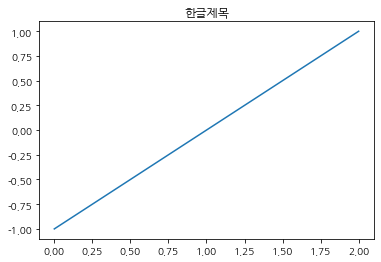

In [ ]:
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl 
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글제목')
plt.plot([-1,0,1])
plt.show()

조사하고 싶은 지역을 입력해주세요 : 아산
아산시 탕정온샘도서관
아산시 중앙도서관
아산시꿈샘어린이청소년도서관
아산시립남산도서관
아산시 송곡도서관
아산시 둔포도서관
아산시 배방도서관
충청남도아산교육지원청아산도서관
어느 도서관과 비교해보시겠습니까? : 아산시 배방도서관


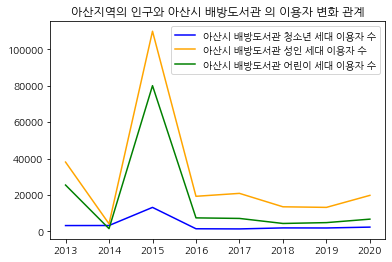

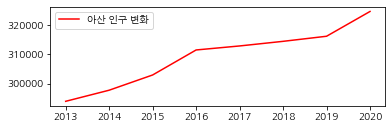

In [67]:
import matplotlib.pyplot as plt
import csv


people=[]



data_p = csv.reader(open("people.csv"))
data_r = csv.reader(open("reader.csv"))
next(data_r)


city = input("조사하고 싶은 지역을 입력해주세요 : ")
for row in data_r :
  if city in row[0] :
    print(row[1])

for row in data_p:
  if city in row[1] :
    for i in range(1,9) :
      people.append(int(row[i*6-4]))

data_p = csv.reader(open("people.csv"))
data_r = csv.reader(open("reader.csv"))
next(data_r)


name = input('어느 도서관과 비교해보시겠습니까?(위의 리스트를 복사해서 넣어주세요) : ')

child = []
youth=[]
adult=[]



for row in data_r :
  if name in row[1]  :
     for x in range(1,9) : 
      youth.append(int(row[3*x]))
      child.append(int(row[3*x-1]))
      adult.append(int(row[3*x+1]))

year = range(2013,2021)
plt.title(city + '지역의 인구와 '+ name + ' 의 이용자 변화 관계')
plt.plot(year,youth, c='blue', label =  name +  ' 청소년 세대 이용자 수')
plt.plot(year,adult, c='orange', label =  name + ' 성인 세대 이용자 수')
plt.plot(year,child, c='green', label =  name + ' 어린이 세대 이용자 수')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(year,people, c='red', label =  city +' 인구 변화')
plt.legend()
plt.show()

      





